In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import koreanize_matplotlib

In [29]:
df = pd.read_csv('../data/SeoulBikeData_labeling_fin1.csv', encoding='cp949')
df

,Date,Year,Month,Day,Rented Bike Count,Hour,Temperature(℃),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(℃),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day of Week,Weekend
0,2017-12-01,2017,12,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Friday,No
1,2017-12-01,2017,12,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Friday,No
2,2017-12-01,2017,12,1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Friday,No
3,2017-12-01,2017,12,1,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Friday,No
4,2017-12-01,2017,12,1,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Friday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,2018,11,30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Friday,No
8756,2018-11-30,2018,11,30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Friday,No
8757,2018-11-30,2018,11,30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Friday,No
8758,2018-11-30,2018,11,30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Friday,No


# 1.데이터 시각화

### 1.1 기간별 대여건수

#### 1.1.1 일별 대여건수

In [30]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')

/var/folders/cy/sw8s66dd02l8b9dj7pqk2ljm0000gn/T/ipykernel_99554/4242627065.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_df = df.groupby('Date').agg('mean')


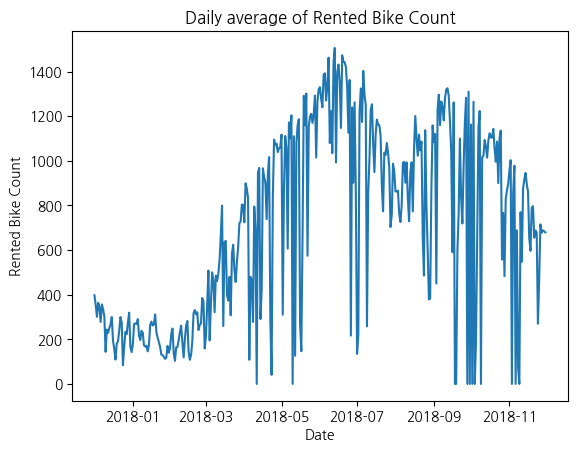

In [31]:
daily_df = df.groupby('Date').agg('mean')

sns.lineplot(x=daily_df.index, y=daily_df['Rented Bike Count'])
plt.title("Daily average of Rented Bike Count")
plt.show()

#### 1.1.2 월별 대여건수

/var/folders/cy/sw8s66dd02l8b9dj7pqk2ljm0000gn/T/ipykernel_99554/172411160.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_df = df.groupby("Month").agg("mean")


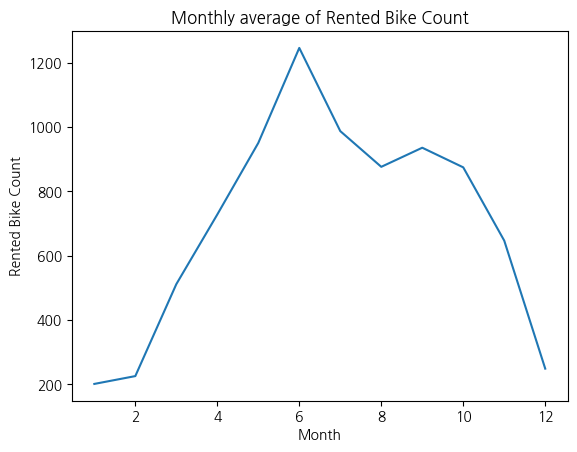

In [32]:
monthly_df = df.groupby("Month").agg("mean")
sns.lineplot(x=monthly_df.index, y=monthly_df['Rented Bike Count'])
plt.title("Monthly average of Rented Bike Count")
plt.show()

#### 1.1.3 시간대별 대여건수

/var/folders/cy/sw8s66dd02l8b9dj7pqk2ljm0000gn/T/ipykernel_99554/1902419271.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly_df = df.groupby("Hour").agg("mean")


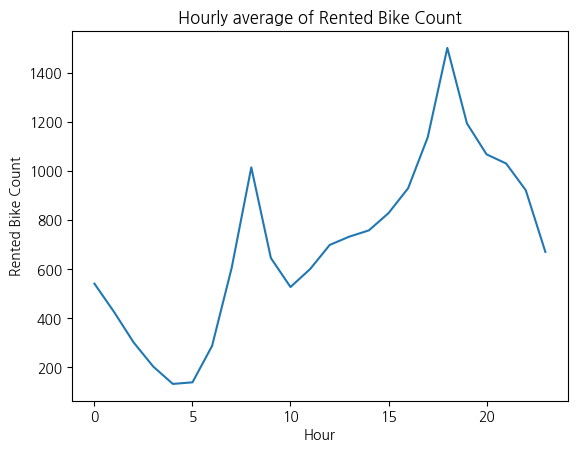

In [33]:
hourly_df = df.groupby("Hour").agg("mean")
sns.lineplot(x=hourly_df.index, y=hourly_df['Rented Bike Count'])
plt.title("Hourly average of Rented Bike Count")
plt.show()

#### 1.1.4 평일 중 시간대별 대여건수

/var/folders/cy/sw8s66dd02l8b9dj7pqk2ljm0000gn/T/ipykernel_99554/1149868278.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekday_df = df[df['Weekend'] == 'No'].groupby("Hour").agg("mean")


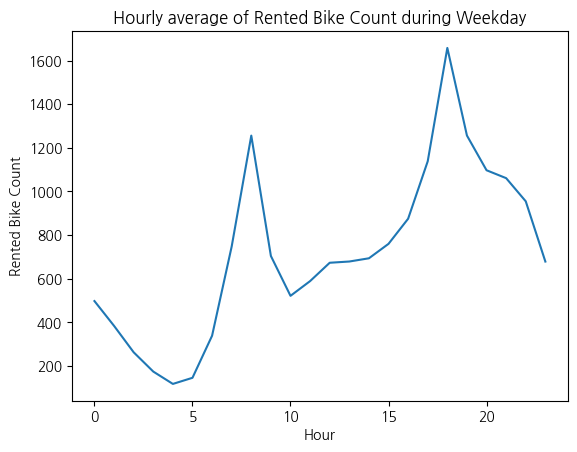

In [36]:
weekday_df = df[df['Weekend'] == 'No'].groupby("Hour").agg("mean")
sns.lineplot(x=weekday_df.index, y=weekday_df['Rented Bike Count'])
plt.title("Hourly average of Rented Bike Count during Weekday")
plt.show()

#### 1.1.5 주말 중 시간대별 대여건수

/var/folders/cy/sw8s66dd02l8b9dj7pqk2ljm0000gn/T/ipykernel_99554/1591436454.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekend_df = df[df['Weekend'] == 'Yes'].groupby("Hour").agg("mean")


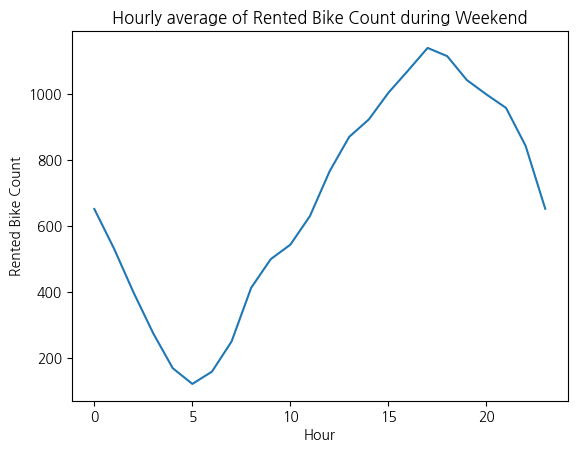

In [37]:
weekend_df = df[df['Weekend'] == 'Yes'].groupby("Hour").agg("mean")
sns.lineplot(x=weekend_df.index, y=weekend_df['Rented Bike Count'])
plt.title("Hourly average of Rented Bike Count during Weekend")
plt.show()

### 1.2 날씨 컬럼별 대여건수

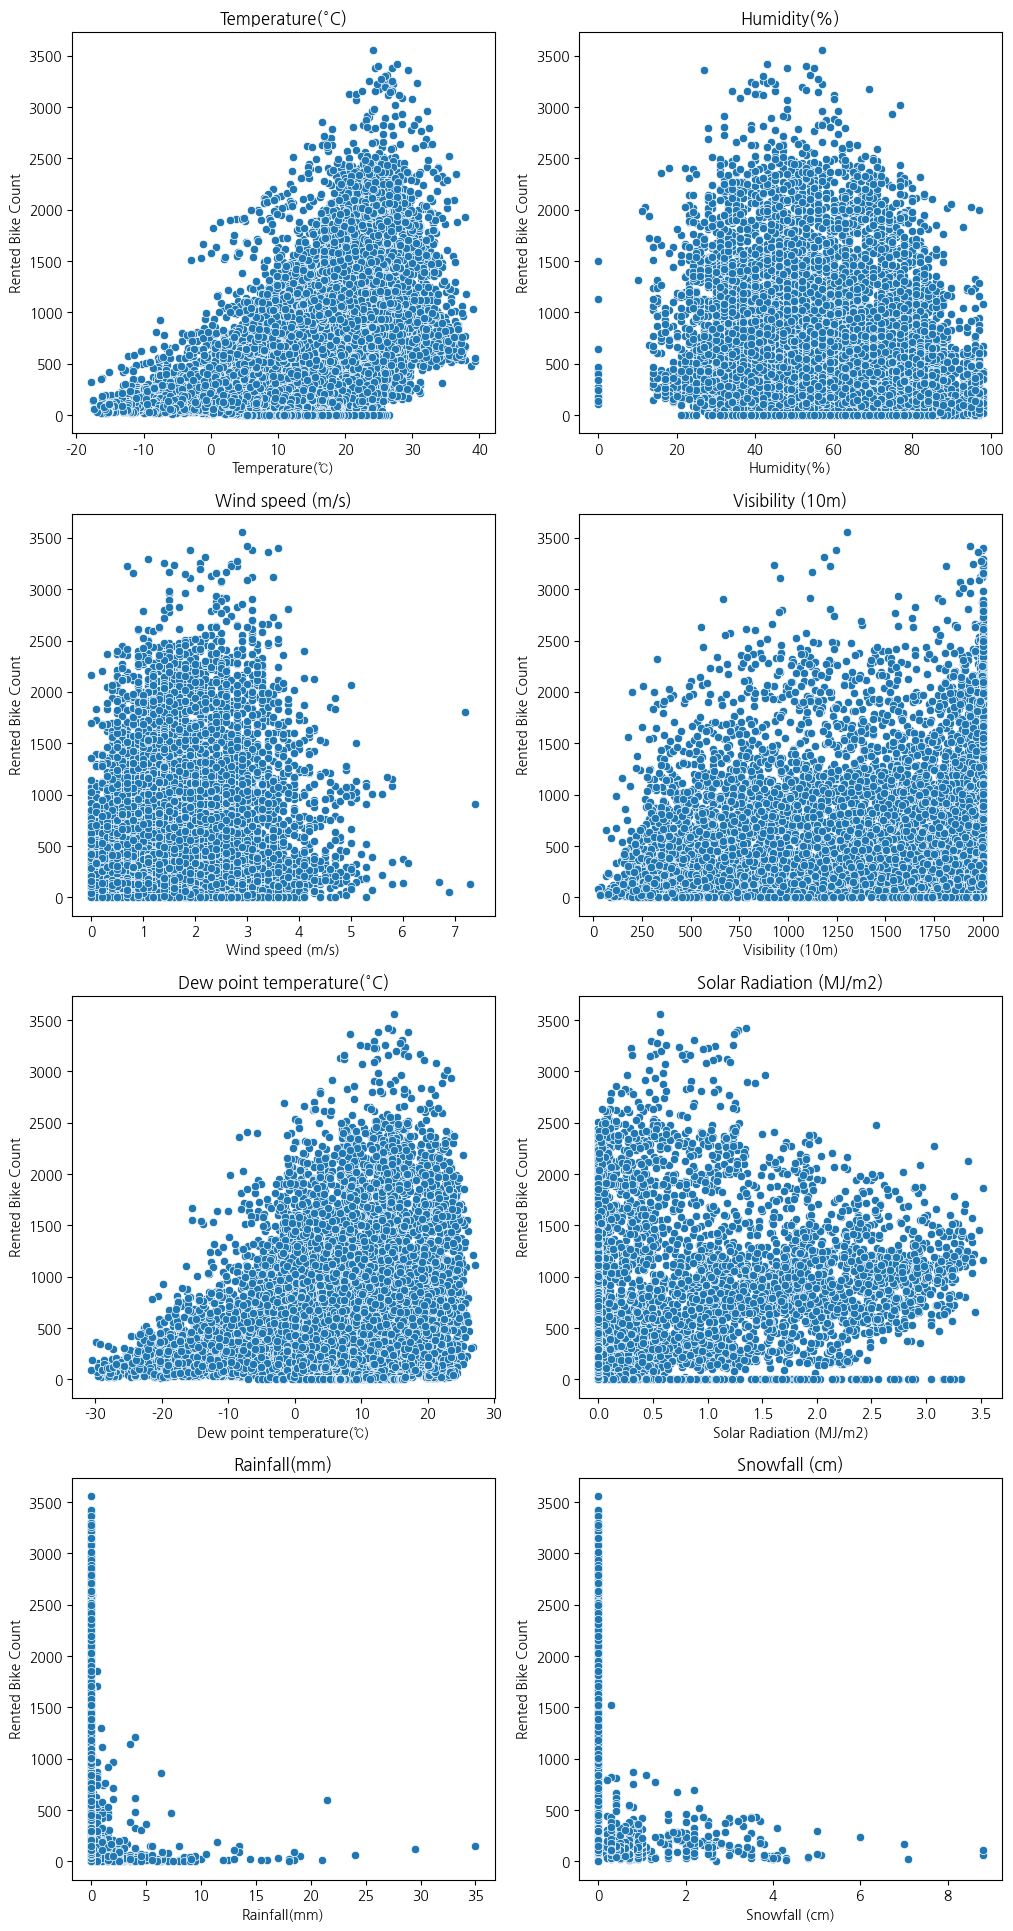

In [38]:
plt.figure(figsize=(12,24))

plt.subplot(421)
sns.scatterplot(x=df["Temperature(℃)"],y=df['Rented Bike Count'])
plt.title("Temperature(°C)")

plt.subplot(422)
sns.scatterplot(x=df["Humidity(%)"],y=df['Rented Bike Count'])
plt.title("Humidity(%)")

plt.subplot(423)
sns.scatterplot(x=df["Wind speed (m/s)"],y=df['Rented Bike Count'])
plt.title("Wind speed (m/s)")

plt.subplot(424)
sns.scatterplot(x=df["Visibility (10m)"],y=df['Rented Bike Count'])
plt.title("Visibility (10m)")

plt.subplot(425)
sns.scatterplot(x=df["Dew point temperature(℃)"],y=df['Rented Bike Count'])
plt.title("Dew point temperature(°C)")

plt.subplot(426)
sns.scatterplot(x=df["Solar Radiation (MJ/m2)"],y=df['Rented Bike Count'])
plt.title("Solar Radiation (MJ/m2)")

plt.subplot(427)
sns.scatterplot(x=df["Rainfall(mm)"],y=df['Rented Bike Count'])
plt.title("Rainfall(mm)")

plt.subplot(428)
sns.scatterplot(x=df["Snowfall (cm)"],y=df['Rented Bike Count'])
plt.title("Snowfall (cm)")

plt.show()

### 1.3 범주형 컬럼별 대여건수

#### 1.3.1 계절별 대여건수

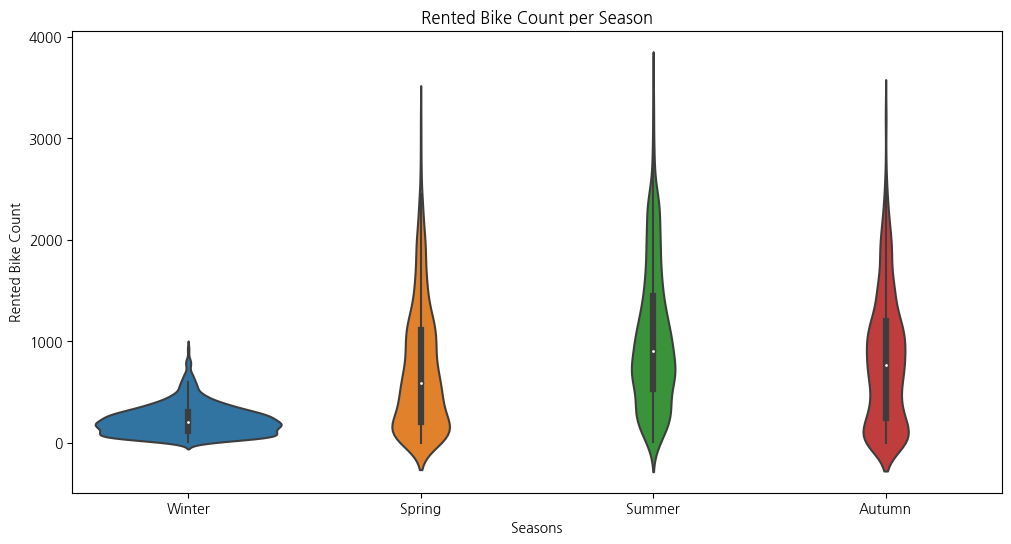

In [39]:
plt.figure(figsize=(12,6))
sns.violinplot(x=df['Seasons'], y=df['Rented Bike Count'])
plt.title('Rented Bike Count per Season')
plt.show()

#### 1.3.2 휴일유무별 대여건수

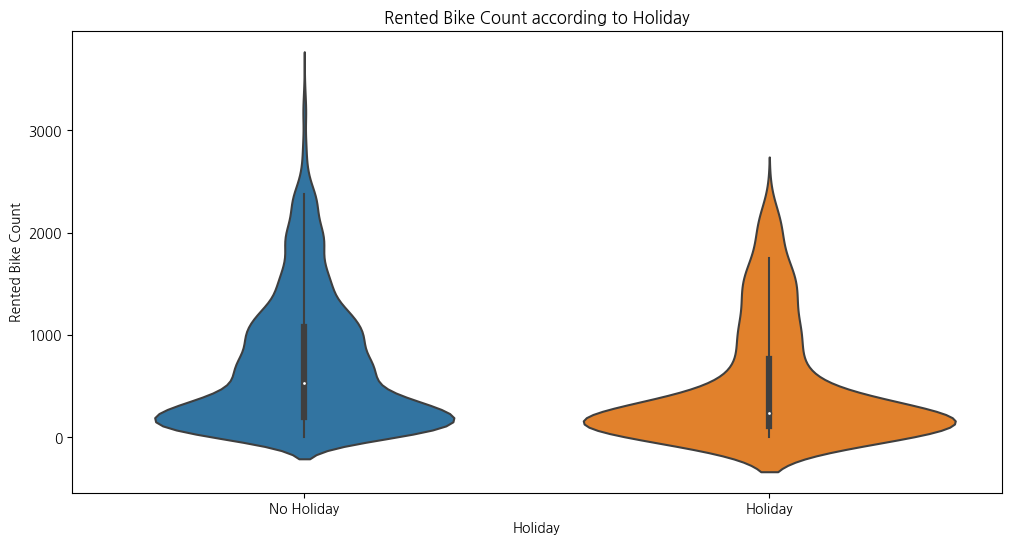

In [40]:
plt.figure(figsize=(12,6))
sns.violinplot(x=df['Holiday'], y=df['Rented Bike Count'])
plt.title('Rented Bike Count according to Holiday')
plt.show()

#### 1.3.3 요일에 따른 대여건수

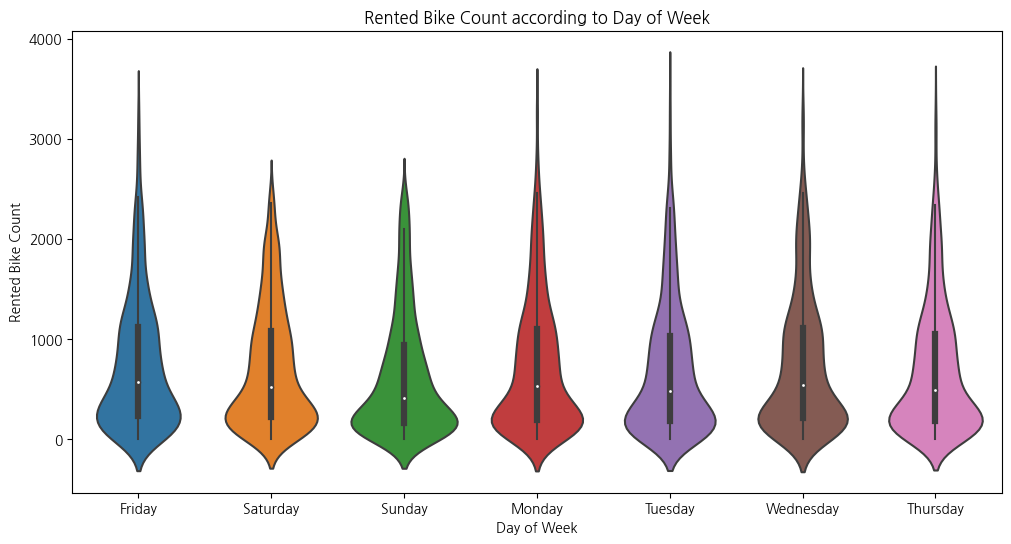

In [43]:
plt.figure(figsize=(12,6))
sns.violinplot(x=df['Day of Week'], y=df['Rented Bike Count'])
plt.title('Rented Bike Count according to Day of Week')
plt.show()

#### 1.3.4 평일과 주말에 따른 대여건수
- 평일: "No", 주말: "Yes" 

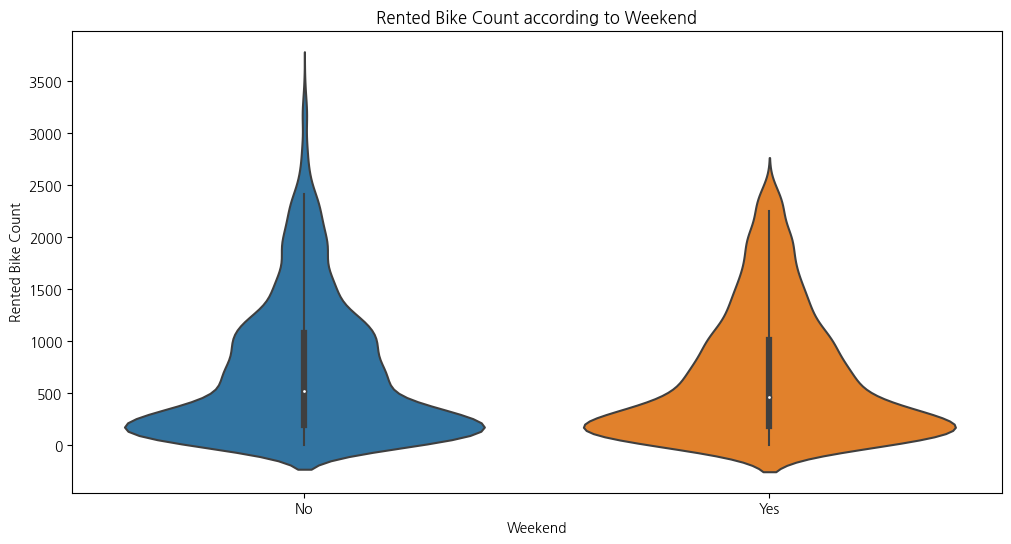

In [44]:
plt.figure(figsize=(12,6))
sns.violinplot(x=df['Weekend'], y=df['Rented Bike Count'])
plt.title('Rented Bike Count according to Weekend')
plt.show()

# 2.데이터 대시보드

### 2.1 대시보드 라이브러리 설치 및 임포트

In [ ]:
!pip install jupyter-dash

In [3]:
import dash
from dash.dependencies import Input, Output
import dash_core_components as dcc
import dash_html_components as html

from pandas_datareader import data as web
from datetime import datetime as dt

app = dash.Dash('Hello World',
                external_stylesheets=[
                    'https://codepen.io/chriddyp/epnbWLwgP.css'
                ])

/Users/kimminsoo/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/var/folders/cy/sw8s66dd02l8b9dj7pqk2ljm0000gn/T/ipykernel_33373/1443168710.py:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/var/folders/cy/sw8s66dd02l8b9dj7pqk2ljm0000gn/T/ipykernel_33373/1443168710.py:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [ ]:
app.layout = html.Div([
	    dcc.Dropdown(
	        id='my-dropdown',
	        options=[
	            {'label': 'Coke', 'value': 'COKE'},
	            {'label': 'Tesla', 'value': 'TSLA'},
	            {'label': 'Apple', 'value': 'AAPL'}
	        ],  
	        value='COKE'
	    ),  
	    dcc.Graph(id='my-graph')
	], style={'width': '500'})
	

@app.callback(Output('my-graph', 'figure'), [Input('my-dropdown', 'value')])
def update_graph(selected_dropdown_value):
	df = web.DataReader(
	    selected_dropdown_value,
	    'yahoo',
	    dt(2017, 1, 1), 
	    dt.now()
	)   
	return {
	    'data': [{
	        'x': df.index,
	        'y': df.Close
	    }], 
	    'layout': {'margin': {'l': 40, 'r': 0, 't': 20, 'b': 30}}
	}   
	

if __name__ == '__main__':
    app.run_server()